# Posterior samples of the parameters of black hole mergers released to date in the second Advanced LIGO--Virgo observing run

**Soumi De<sup>1</sup>, Collin D. Capano<sup>2,3</sup>, Christopher M. Biwer<sup>4</sup>, Alexander H. Nitz<sup>2,3</sup>, Duncan A. Brown<sup>1</sup>**

**<sup>1</sup>Department of Physics, Syracuse University, Syracuse, NY 13244, USA**

**<sup>2</sup>Albert-Einstein-Institut, Max-Planck-Institut for Gravitationsphysik, D-30167 Hannover, Germany**

**<sup>3</sup>Leibniz Universit{\"a}t Hannover, D-30167, Hannover, Germany**

**<sup>4</sup>Los Alamos National Laboratory, Los Alamos, NM 87545, USA**

## License

![Creative Commons License](https://i.creativecommons.org/l/by-sa/3.0/us/88x31.png "Creative Commons License")

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-sa/3.0/us/).

## Introduction

This is the first public data release of samples from the posterior probability density function for the three binary black hole mergers---GW170104, GW170608, and GW170814---detected during the second observing run of the Advanced LIGO and Virgo observatories. The analysis to generate the data is presented in the paper posted at [arxiv:1811.09232](https://arxiv.org/abs/1811.09232). We provide a notebook to demonstrate how to read the files containing the posterior samples, handle the data, tools for visualizing the data, and commands for reconstructing figures 1, 2 and 3 in the paper. We also provide the configuration files and sample scripts with command lines to replicate our analyses for the three events to generate these data.

We encourage use of these data in derivative works. If you use the material provided here, please cite the companion paper for this data release using the following reference. The companion paper provides a description of the data and our analyses for generating these data.
```
@article{De:2018,
      author         = "De, Soumi and Capano, Collin D. and Biwer, C. M. and Nitz, Alexander H. and Brown, Duncan A.",
      title          = "{Posterior samples of the parameters of black hole mergers released to date in the second Advanced LIGO--Virgo observing run}",
      year           = "2018",
      eprint         = "1811.09232",
      archivePrefix  = "arXiv",
      primaryClass   = "astro-ph.IM",
      SLACcitation   = "%%CITATION = ARXIV:1811.09232;%%"
}
```

Please also cite [Biwer et al. (2018)](https://arxiv.org/abs/1807.10312) using the following reference. This paper describes and validates the PyCBC Inference parameter estimation toolkit that was used for generating the data.
```
@article{Biwer:2018,
      author         = "Biwer, C. M. and Capano, Collin D. and De, Soumi and
                        Cabero, Miriam and Brown, Duncan A. and Nitz, Alexander H. and Raymond, V.",
      title          = "{PyCBC Inference: A Python-based parameter estimation toolkit for compact-object merger signals}",
      year           = "2018",
      eprint         = "1807.10312",
      archivePrefix  = "arXiv",
      primaryClass   = "astro-ph.IM",
      SLACcitation   = "%%CITATION = ARXIV:1807.10312;%%"
}
```

The parameter estimation analyses to generate the posterior samples and construction of the figures to visualize the results have been performed with **PyCBC v1.12.3**.

The contents in the repository are organized as follows :

- ``data_release_o2_bbh_pe.ipynb`` : Notebook demonstrating tools to handle the released posteriors, visualize them, and reconstruct Figures in the paper arxiv:1811.09232

- ``posteriors`` : Directory having the posterior files
    - ``GW170104`` : Directory for GW170104
        - [gw170104_posteriors_thinned.hdf](https://github.com/gwastro/o2-bbh-pe/blob/master/posteriors/GW170104/gw170104_posteriors_thinned.hdf) : File containing posterior samples from the MCMC for measuring properties of GW170104.
    - ``GW170608`` : Directory for GW170608
        - [gw170608_posteriors_thinned.hdf](https://github.com/gwastro/o2-bbh-pe/blob/master/posteriors/GW170608/gw170608_posteriors_thinned.hdf) : File containing posterior samples from the MCMC for measuring properties of GW170608.
    - ``GW170814`` : Directory for GW170814
        - [gw170814_posteriors_thinned.hdf](https://github.com/gwastro/o2-bbh-pe/blob/master/posteriors/GW170814/gw170814_posteriors_thinned.hdf) : File containing posterior samples from the MCMC for measuring properties of GW170814.

- ``run_files`` : Directory having run scripts and configuration files to replicate the analyses
    - ``GW170104`` : Directory for GW170104
        - ``gw170104_inference.ini`` : Configuration file for GW170104 analysis
        - ``run_pycbc_inference_gw170104.sh`` : Run script for GW170104 analysis
    - ``GW170608`` : Directory for GW170608
        - ``gw170608_inference.ini`` : Configuration file for GW170608 analysis
        - ``run_pycbc_inference_gw170608.sh`` : Run script for GW170608 analysis
    - ``GW170814`` : Directory for GW170814 :
        - ``gw170814_inference.ini`` : Configuration file for GW170814 analysis
        - ``run_pycbc_inference_gw170814.sh`` : Run script for GW170814 analysis
    - ``run_pycbc_inference_extract_samples.sh`` : Contains command for extracting independent samples from the full chains obtained from the MCMC runs.
        
## Running the notebook in a Docker container

This notebook can be run from a PyCBC Docker container, or a machine with PyCBC installed. Instructions for [downloading the docker container](http://gwastro.github.io/pycbc/latest/html/docker.html) are available from the [PyCBC home page.](https://pycbc.org/) To start a container with instance of Jupyter notebook, run the commands
```sh
docker pull pycbc/pycbc-el7:v1.12.3
docker run -p 8888:8888 --name pycbc_notebook -it pycbc/pycbc-el7:v1.12.3 /bin/bash -l
```
Once the container has started, this git repository can be downloaded with the command:
```sh
git clone https://github.com/gwastro/o2-bbh-pe.git
```
The notebook server can be started inside the container with the command:
```sh
jupyter notebook --ip 0.0.0.0 --no-browser
```
You can then connect to the notebook server at the URL printed by ``jupyter``. Navigate to the directory `o2-bbh-pe` in the cloned git repository and open [data_release_o2_bbh_pe.ipynb](https://github.com/gwastro/o2-bbh-pe/blob/master/data_release_o2_bbh_pe.ipynb) (this notebook).



## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
import h5py
from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pycbc.io.inference_hdf import InferenceFile
import numpy
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['font.size'] = 16

The data files store posteriors for the variable parameters ( `variable_args` ) in the MCMC. To check the parameter names that are stored in the posteriors file from the analysis of any of the events (say GW170104), use the appropriate file and do :

In [2]:
fp = h5py.File("posteriors/GW170104/gw170104_posteriors_thinned.hdf", "r")
print fp.attrs['variable_args']
fp.close()

['tc' 'mass1' 'mass2' 'spin1_a' 'spin1_azimuthal' 'spin1_polar' 'spin2_a'
 'spin2_azimuthal' 'spin2_polar' 'distance' 'inclination' 'polarization'
 'ra' 'dec']


Posteriors for the `variable_args` are stored inside the `samples` group of the hdf data files. PyCBC provides a handler class `pycbc.io.InferenceFile` that extends `h5py.File`. To read the output file and get samples for any of the `variable_args`, say `mass1`, do :

In [3]:
fp = InferenceFile("posteriors/GW170104/gw170104_posteriors_thinned.hdf", "r")
samples = fp.read_samples('mass1', samples_group='samples')
mass1_samples = samples['mass1']
print mass1_samples
fp.close()

[46.32240178 26.10568348 41.49380345 ... 20.4358697  37.81164971
 36.91088935]


Using the PyCBC software, one can map the posteriors for the `variable_args` to posteriors of other parameters. PyCBC has several functions that can be used to do the general transforms between parameters. You can look in `pycbc.conversions`, `pycbc.coordinates`, `pycbc.cosmology` for the possible transforms that you can do with the available `variable_args`. For example, to obtain the the chirp mass of the binary `mchirp` from the component masses `(mass1, mass2)` one would do :

In [15]:
from pycbc import conversions

fp=InferenceFile("posteriors/GW170104/gw170104_posteriors_thinned.hdf",'r')
samples = fp.read_samples(['mass1', 'mass2'], samples_group='samples')
mass1 = samples['mass1']
mass2 = samples['mass2']
fp.close()

mchirp = conversions.mchirp_from_mass1_mass2(mass1, mass2)
print mchirp

[24.59675361 26.04084579 24.4225473  ... 25.89913542 23.13586394
 24.66949523]


PyCBC has some common transforms pre-defined in the code, which can be used to derive some of the standard parameters from the `variable_args` parameters in the data file. For example, `( mass1, mass2 )` present in `variable_args` can be used to obtain derived parameters such as `mchirp` and `q`. The parameters whose posteriors are plotted below include some of such derived parameters. 

## To plot Fig. 1 of the paper : $m_1^{\mathrm{src}} - m_2^{\mathrm{src}}$ posteriors

Below are examples that will plot the component masses in the source frame : $m_1^{\mathrm{src}} - m_2^{\mathrm{src}}$ posteriors from the PyCBC Inference analyses GW170104, GW170608, and GW170814 presented in Figure 1 in the paper. We have utilized plotting functions from the module ``https://github.com/gwastro/pycbc/blob/v1.12.3/pycbc/results/scatter_histograms.py`` in PyCBC for generating this plot.

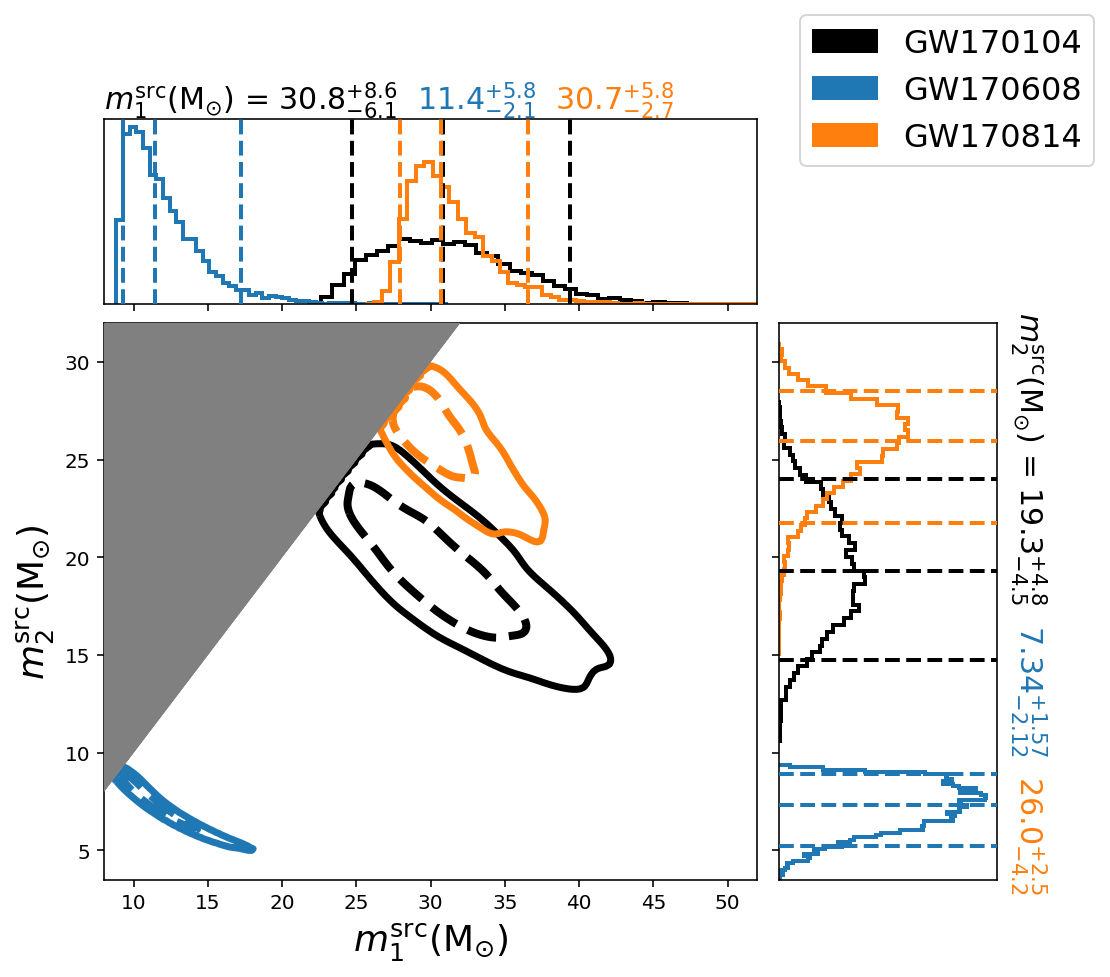

In [6]:
import argparse
import logging
import numpy
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
import pycbc
import pycbc.version
import sys
from matplotlib import patches
from matplotlib import pyplot
from pycbc.inference import option_utils, likelihood
from pycbc.io.inference_hdf import InferenceFile
from pycbc.results import metadata
from pycbc.results.scatter_histograms import create_multidim_plot
import numpy
import scipy.stats
import itertools
import matplotlib

from pycbc.results.scatter_histograms import construct_kde, create_axes_grid, get_scale_fac, create_marginalized_hist, set_marginal_histogram_title
# Only if a backend is not already set ... This should really *not* be done
# here, but in the executables you should set matplotlib.use()
# This matches the check that matplotlib does internally, but this *may* be
# version dependenant. If this is a problem then remove this and control from
# the executables directly.
#if not 'matplotlib.backends' in sys.modules:
#    matplotlib.use('agg')
from matplotlib import offsetbox
from matplotlib import pyplot
import matplotlib.gridspec as gridspec
from pycbc.results import str_utils
from pycbc.io import FieldArray
import matplotlib.ticker as ticker

def create_density_plot(xparam, yparam, samples, plot_density=True,
        plot_contours=True, percentiles=None, cmap='viridis',
        contour_color=None, xmin=None, xmax=None, ymin=None, ymax=None,
        exclude_region=None, fig=None, ax=None, use_kombine=False, grid_on=False):
    """Computes and plots posterior density and confidence intervals using the
    given samples.

    Parameters
    ----------
    xparam : string
        The parameter to plot on the x-axis.
    yparam : string
        The parameter to plot on the y-axis.
    samples : dict, numpy structured array, or FieldArray
        The samples to plot.
    plot_density : {True, bool}
        Plot a color map of the density.
    plot_contours : {True, bool}
        Plot contours showing the n-th percentiles of the density.
    percentiles : {None, float or array}
        What percentile contours to draw. If None, will plot the 50th
        and 90th percentiles.
    cmap : {'viridis', string}
        The name of the colormap to use for the density plot.
    contour_color : {None, string}
        What color to make the contours. Default is white for density
        plots and black for other plots.
    xmin : {None, float}
        Minimum value to plot on x-axis.
    xmax : {None, float}
        Maximum value to plot on x-axis.
    ymin : {None, float}
        Minimum value to plot on y-axis.
    ymax : {None, float}
        Maximum value to plot on y-axis.
    exclue_region : {None, str}
        Exclude the specified region when plotting the density or contours.
        Must be a string in terms of `xparam` and `yparam` that is
        understandable by numpy's logical evaluation. For example, if
        `xparam = m_1` and `yparam = m_2`, and you want to exclude the region
        for which `m_2` is greater than `m_1`, then exclude region should be
        `'m_2 > m_1'`.
    fig : {None, pyplot.figure}
        Add the plot to the given figure. If None and ax is None, will create
        a new figure.
    ax : {None, pyplot.axes}
        Draw plot on the given axis. If None, will create a new axis from
        `fig`.
    use_kombine : {False, bool}
        Use kombine's KDE to calculate density. Otherwise, will use
        `scipy.stats.gaussian_kde.` Default is False.

    Returns
    -------
    fig : pyplot.figure
        The figure the plot was made on.
    ax : pyplot.axes
        The axes the plot was drawn on.
    """
    if percentiles is None:
        percentiles = numpy.array([50., 90.])
    percentiles = 100. - numpy.array(percentiles)
    percentiles.sort()
    if ax is None and fig is None:
        fig = pyplot.figure()
    if ax is None:
        ax = fig.add_subplot(111)

    if grid_on:
        ax.grid(True, linestyle='dotted', color='darkgray')
    # convert samples to array and construct kde
    xsamples = samples[xparam]
    ysamples = samples[yparam]
    arr = numpy.vstack((xsamples, ysamples)).T
    kde = construct_kde(arr, use_kombine=use_kombine)

    # construct grid to evaluate on
    if xmin is None:
        xmin = xsamples.min()
    if xmax is None:
        xmax = xsamples.max()
    if ymin is None:
        ymin = ysamples.min()
    if ymax is None:
        ymax = ysamples.max()
    npts = 200
    X, Y = numpy.mgrid[xmin:xmax:complex(0,npts), ymin:ymax:complex(0,npts)] # pylint:disable=invalid-slice-index
    X_ravel = X.ravel()
    Y_ravel = Y.ravel()
    pos = numpy.vstack([X_ravel, Y_ravel])

    Z_ravel = kde(pos).T
    draw = kde.resample


    for i in range(len(X_ravel)):
        if X_ravel[i] <= Y_ravel[i]:
            Z_ravel[i] = 0
    X = X_ravel.reshape(X.shape)
    Y = Y_ravel.reshape(X.shape)
    Z = Z_ravel.reshape(X.shape)
    
    if plot_contours:
        # compute the percentile values
        resamps = kde(draw(int(npts**2)))
        if use_kombine:
            resamps = numpy.exp(resamps)
        s = numpy.percentile(resamps, percentiles)
        if contour_color is None:
            contour_color = 'k'
        lw = 2
        ct90 = ax.contour(X, Y, Z, s[0], colors=contour_color, linewidths=3.5, linestyles="solid",
                        zorder=3)
        ct50 = ax.contour(X, Y, Z, s[1], colors=contour_color, linewidths=4, linestyles="dashed",
                        zorder=3)
        
        # label contours
        lbls = ['{p}%'.format(p=int(p)) for p in (100. - percentiles)]
        
        x=numpy.linspace(8, 34, num=50)
        y1=x
        ax.fill_between(x, x, 32, facecolor='gray', zorder=10)

    return fig, ax

def create_multidim_plot(parameters, samples, labels=None,
                mins=None, maxs=None, expected_parameters=None,
                expected_parameters_color='r',
                plot_marginal=True, plot_scatter=True,
                marginal_percentiles=None, contour_percentiles=None,
                zvals=None, show_colorbar=True, cbar_label=None,
                vmin=None, vmax=None, scatter_cmap='plasma',
                plot_density=False, plot_contours=True,
                density_cmap='viridis',
                contour_color=None, hist_color='black',
                line_color=None, fill_color='gray',
                use_kombine=False, fig=None, axis_dict=None, grid_on=False):
    """Generate a figure with several plots and histograms.

    Parameters
    ----------
    parameters: list
        Names of the variables to be plotted.
    samples : FieldArray
        A field array of the samples to plot.
    labels: {None, list}, optional
        A list of names for the parameters.
    mins : {None, dict}, optional
        Minimum value for the axis of each variable in `parameters`.
        If None, it will use the minimum of the corresponding variable in
        `samples`.
    maxs : {None, dict}, optional
        Maximum value for the axis of each variable in `parameters`.
        If None, it will use the maximum of the corresponding variable in
        `samples`.
    expected_parameters : {None, dict}, optional
        Expected values of `parameters`, as a dictionary mapping parameter
        names -> values. A cross will be plotted at the location of the
        expected parameters on axes that plot any of the expected parameters.
    expected_parameters_color : {'r', string}, optional
        What color to make the expected parameters cross.
    plot_marginal : {True, bool}
        Plot the marginalized distribution on the diagonals. If False, the
        diagonal axes will be turned off.
    plot_scatter : {True, bool}
        Plot each sample point as a scatter plot.
    marginal_percentiles : {None, array}
        What percentiles to draw lines at on the 1D histograms.
        If None, will draw lines at `[5, 50, 95]` (i.e., the bounds on the
        upper 90th percentile and the median).
    contour_percentiles : {None, array}
        What percentile contours to draw on the scatter plots. If None,
        will plot the 50th and 90th percentiles.
    zvals : {None, array}
        An array to use for coloring the scatter plots. If None, scatter points
        will be the same color.
    show_colorbar : {True, bool}
        Show the colorbar of zvalues used for the scatter points. A ValueError
        will be raised if zvals is None and this is True.
    cbar_label : {None, str}
        Specify a label to add to the colorbar.
    vmin: {None, float}, optional
        Minimum value for the colorbar. If None, will use the minimum of zvals.
    vmax: {None, float}, optional
        Maximum value for the colorbar. If None, will use the maxmimum of
        zvals.
    scatter_cmap : {'plasma', string}
        The color map to use for the scatter points. Default is 'plasma'.
    plot_density : {False, bool}
        Plot the density of points as a color map.
    plot_contours : {True, bool}
        Draw contours showing the 50th and 90th percentile confidence regions.
    density_cmap : {'viridis', string}
        The color map to use for the density plot.
    contour_color : {None, string}
        The color to use for the contour lines. Defaults to white for
        density plots, navy for scatter plots without zvals, and black
        otherwise.
    use_kombine : {False, bool}
        Use kombine's KDE to calculate density. Otherwise, will use
        `scipy.stats.gaussian_kde.` Default is False.

    Returns
    -------
    fig : pyplot.figure
        The figure that was created.
    axis_dict : dict
        A dictionary mapping the parameter combinations to the axis and their
        location in the subplots grid; i.e., the key, values are:
        `{('param1', 'param2'): (pyplot.axes, row index, column index)}`
    """
    if labels is None:
        labels = [p for p in parameters]
    # turn labels into a dict for easier access
    labels = dict(zip(parameters, labels))
    # set up the figure with a grid of axes
    # if only plotting 2 parameters, make the marginal plots smaller
    nparams = len(parameters)
    if nparams == 2:
        width_ratios = [3,1]
        height_ratios = [1,3]
    else:
        width_ratios = height_ratios = None


    # convert samples to a dictionary to avoid re-computing derived parameters
    # every time they are needed
    samples = dict([[p, samples[p]] for p in parameters])

    # values for axis bounds
    if mins is None:
        mins = {p:samples[p].min() for p in parameters}
    else:
        # copy the dict
        mins = {p:val for p,val in mins.items()}
    if maxs is None:
        maxs = {p:samples[p].max() for p in parameters}
    else:
        # copy the dict
        maxs = {p:val for p,val in maxs.items()}

    # remove common offsets
    for pi,param in enumerate(parameters):
        values, offset = remove_common_offset(samples[param])
        if offset != 0:
            # we'll add the offset removed to the label
            labels[param] = '{} - {:d}'.format(labels[param], offset)
            samples[param] = values
            mins[param] = mins[param] - float(offset)
            maxs[param] = maxs[param] - float(offset)

    # create the axis grid
    if fig is None and axis_dict is None:
        fig, axis_dict = create_axes_grid(
            parameters, labels=labels,
            width_ratios=width_ratios, height_ratios=height_ratios,
            no_diagonals=not plot_marginal)
        
    # Diagonals...
    if plot_marginal:
        for pi,param in enumerate(parameters):
            ax, _, _ = axis_dict[param, param]
            # if only plotting 2 parameters and on the second parameter,
            # rotate the marginal plot
            rotated = nparams == 2 and pi == nparams-1
            # see if there are expected values
            if expected_parameters is not None:
                try:
                    expected_value = expected_parameters[param]
                except KeyError:
                    expected_value = None
            else:
                expected_value = None
            create_marginalized_hist(ax, samples[param], label=labels[param],
                color=hist_color, fillcolor=fill_color, linecolor=line_color,
                title=True, expected_value=expected_value,
                expected_color=expected_parameters_color,
                rotated=rotated, plot_min=mins[param], plot_max=maxs[param],
                percentiles=marginal_percentiles)

    # Off-diagonals...
    for px, py in axis_dict:
        if px == py:
            continue
        ax, _, _ = axis_dict[px, py]

        if plot_contours or plot_density:
            # Exclude out-of-bound regions
            # this is a bit kludgy; should probably figure out a better
            # solution to eventually allow for more than just m_p m_s
            if (px == 'm_p' and py == 'm_s') or (py == 'm_p' and px == 'm_s'):
                exclude_region = 'm_s > m_p'
            else:
                exclude_region = None
            create_density_plot(px, py, samples, plot_density=plot_density,
                    plot_contours=plot_contours, cmap=density_cmap,
                    percentiles=contour_percentiles,
                    contour_color=contour_color, xmin=mins[px], xmax=maxs[px],
                    ymin=mins[py], ymax=maxs[py],
                    exclude_region=exclude_region, ax=ax,
                    use_kombine=use_kombine, grid_on=grid_on)

        ax.set_xlim(mins[px], maxs[px])
        ax.set_ylim(mins[py], maxs[py])

    # adjust tick number for large number of plots
    if len(parameters) > 3:
        for px, py in axis_dict:
            ax, _, _ = axis_dict[px, py]
            ax.set_xticks(reduce_ticks(ax, 'x', maxticks=3))
            ax.set_yticks(reduce_ticks(ax, 'y', maxticks=3))

    return fig, axis_dict


def remove_common_offset(arr):
    """Given an array of data, removes a common offset > 1000, returning the
    removed value.
    """
    offset = 0
    isneg = (arr <= 0).all()
    # make sure all values have the same sign
    if isneg or (arr >= 0).all():
        # only remove offset if the minimum and maximum values are the same
        # order of magintude and > O(1000)
        minpwr = numpy.log10(abs(arr).min())
        maxpwr = numpy.log10(abs(arr).max())
        if numpy.floor(minpwr) == numpy.floor(maxpwr) and minpwr > 3:
            offset = numpy.floor(10**minpwr)
            if isneg:
                offset *= -1
            arr = arr - offset
    return arr, int(offset)


def reduce_ticks(ax, which, maxticks=3):
    """Given a pyplot axis, resamples its `which`-axis ticks such that are at most
    `maxticks` left.
    Parameters
    ----------
    ax : axis
        The axis to adjust.
    which : {'x' | 'y'}
        Which axis to adjust.
    maxticks : {3, int}
        Maximum number of ticks to use.

    Returns
    -------
    array
        An array of the selected ticks.
    """
    ticks = getattr(ax, 'get_{}ticks'.format(which))()
    if len(ticks) > maxticks:
        # make sure the left/right value is not at the edge
        minax, maxax = getattr(ax, 'get_{}lim'.format(which))()
        dw = abs(maxax-minax)/10.
        start_idx, end_idx = 0, len(ticks)
        if ticks[0] < minax + dw:
            start_idx += 1
        if ticks[-1] > maxax - dw:
            end_idx -= 1
        # get reduction factor
        fac = int(len(ticks) / maxticks)
        ticks = ticks[start_idx:end_idx:fac]
    return ticks


sys.argv = ['foo']
parser = argparse.ArgumentParser()

opts = parser.parse_args()
opts.output_file = 'm1m2source.png'
opts.input_file = ['posteriors/GW170104/gw170104_posteriors_thinned.hdf', 'posteriors/GW170608/gw170608_posteriors_thinned.hdf', 'posteriors/GW170814/gw170814_posteriors_thinned.hdf']
opts.plot_marginal = True
opts.plot_contour = True
opts.input_file_labels = ["GW170104", "GW170608", "GW170814"]
opts.parameters = ['primary_mass(mass1, mass2)/(1+redshift):$m_1^{\\mathrm{src}}    (\\mathrm{M}_{\\odot})$', 'secondary_mass(mass1, mass2)/(1+redshift):$m_2^{\\mathrm{src}}    (\\mathrm{M}_{\\odot})$']
opts.maxs=['primary_mass(mass1, mass2)/(1+redshift):52', 'secondary_mass(mass1, mass2)/(1+redshift):32']
opts.mins=['primary_mass(mass1, mass2)/(1+redshift):8', 'secondary_mass(mass1, mass2)/(1+redshift):3.5']
opts.thin_start = None
opts.thin_interval=None
opts.thin_end = None
opts.iteration =None
opts.parameters_group='samples'
opts.marginal_percentiles=None

# add options for what plots to create
option_utils.add_plot_posterior_option_group(parser)

# density configuration
option_utils.add_density_option_group(parser)

# add standard option utils
option_utils.add_inference_results_option_group(parser)

# get parameters
fp, parameters, labels, samples = option_utils.results_from_cli(opts)

zvals = None
zlbl = None
for f in fp:
    f.close()

mins, maxs = option_utils.plot_ranges_from_cli(opts)

colors = itertools.cycle(["black"] + ["C{}".format(i) for i in range(10)])
hist_colors = []
for i, (p, l, s) in enumerate(zip(parameters, labels, samples)):
    # on first iteration create figure otherwise update old figure
    if i == 0:
        fig = None
        axis_dict = None

    # loop over some contour colors
    contour_color = colors.next()
    fill_color = None
    # make histograms filled if only one input file to plot
    fill_color = "gray" if len(opts.input_file) == 1 else None

    # make histogram black lines if only one
    hist_color = contour_color
    hist_colors.append(hist_color)

    # pick a new color for each input file
    linecolor = contour_color

    # plot
    fig, axis_dict = create_multidim_plot(
                    p, s, labels=l, fig=fig, axis_dict=axis_dict,
                    plot_marginal=opts.plot_marginal,
                    marginal_percentiles=opts.marginal_percentiles,
                    contour_color=contour_color,
                    hist_color=hist_color,
                    line_color=contour_color,
                    fill_color=fill_color,
                    mins=mins, maxs=maxs)


if opts.input_file_labels:
    handles = []
    for color, label in zip(hist_colors, opts.input_file_labels):
        handles.append(patches.Patch(color=color, label=label))
    fig.legend(loc="upper right", handles=handles,
               labels=opts.input_file_labels, fontsize=16)
    
fig.show()
                              

## To plot Fig. 2 of the paper : $q - \chi_{\mathrm{eff}}$ posteriors

Below are examples that will plot the mass ratio-effective spin : $q - \chi_{\mathrm{eff}}$ posteriors presented in figure 2 and the distance-inclination angle : $d_L - \iota$ posteriors presented in figure 3 in the paper. To plot the posteriors, we use a built-in plotting script provided by PyCBC Inference that handles formatting and any necessary parameter conversions. Some formatting differences may be present, but if you're running a development version of PyCBC then you can adjust these as desired in the plotting code.

In [35]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/GW170104/gw170104_posteriors_thinned.hdf posteriors/GW170608/gw170608_posteriors_thinned.hdf posteriors/GW170814/gw170814_posteriors_thinned.hdf \
    --output-file q_chieff.png \
    --plot-contours \
    --plot-marginal \
    --parameters "(primary_mass(mass1, mass2))/(secondary_mass(mass1, mass2)):\$q$" \
                  chi_eff \
    --input-file-labels "GW170104" "GW170608" "GW170814" \
    --mins "chi_eff:-0.5" \
    --maxs "(primary_mass(mass1, mass2))/(secondary_mass(mass1, mass2)):4.0" \
           "chi_eff:0.5"

2018-11-21 16:02:35,259 Loading parameters
2018-11-21 16:02:35,259 Reading input file posteriors/GW170104/gw170104_posteriors_thinned.hdf
2018-11-21 16:02:35,262 Loading samples
2018-11-21 16:02:35,330 Reading input file posteriors/GW170608/gw170608_posteriors_thinned.hdf
2018-11-21 16:02:35,332 Loading samples
2018-11-21 16:02:35,399 Reading input file posteriors/GW170814/gw170814_posteriors_thinned.hdf
2018-11-21 16:02:35,401 Loading samples
2018-11-21 16:02:35,473 Plotting
/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
2018-1

2018-11-21 16:02:55,258 STREAM 'IHDR' 16 13
2018-11-21 16:02:55,259 STREAM 'sBIT' 41 4
2018-11-21 16:02:55,259 'sBIT' 41 4 (unknown)
2018-11-21 16:02:55,259 STREAM 'pHYs' 57 9
2018-11-21 16:02:55,259 STREAM 'tEXt' 78 57
2018-11-21 16:02:55,259 STREAM 'IDAT' 147 8192
2018-11-21 16:02:55,478 Done


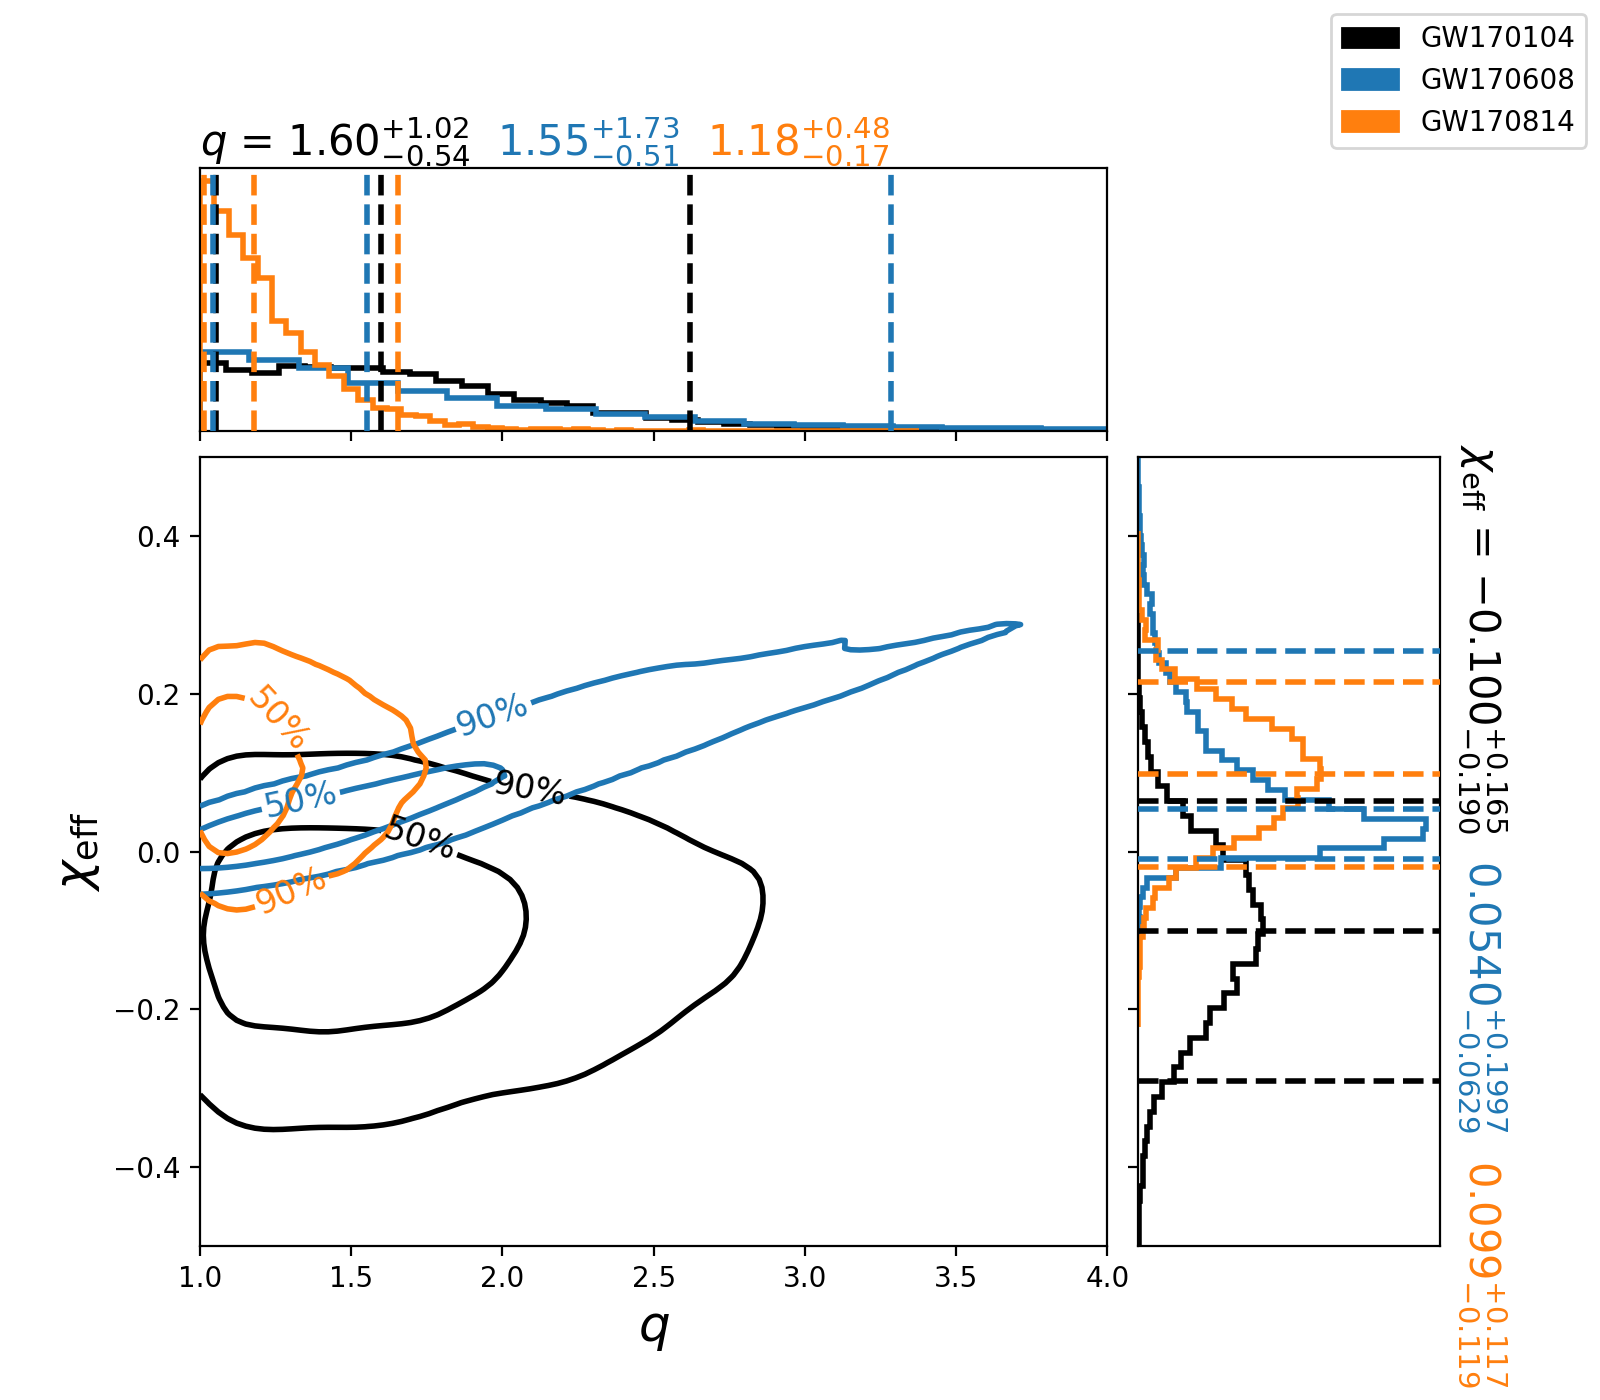

In [36]:
Image('q_chieff.png')

## To plot Fig. 3 of the paper : $\iota - d_L$ posteriors

In [38]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/GW170104/gw170104_posteriors_thinned.hdf posteriors/GW170608/gw170608_posteriors_thinned.hdf posteriors/GW170814/gw170814_posteriors_thinned.hdf \
    --output-file iota_dl.png \
    --plot-contours \
    --plot-marginal \
    --parameters "inclination*180/pi:$\iota$ (deg)" \
                  distance \
    --input-file-labels "GW170104" "GW170608" "GW170814" \
    --mins "inclination*180/pi:0" \
    --maxs "inclination*180/pi:180" \
           "distance:1800"

2018-11-21 16:03:24,308 Loading parameters
2018-11-21 16:03:24,308 Reading input file posteriors/GW170104/gw170104_posteriors_thinned.hdf
2018-11-21 16:03:24,310 Loading samples
2018-11-21 16:03:24,316 Reading input file posteriors/GW170608/gw170608_posteriors_thinned.hdf
2018-11-21 16:03:24,318 Loading samples
2018-11-21 16:03:24,322 Reading input file posteriors/GW170814/gw170814_posteriors_thinned.hdf
2018-11-21 16:03:24,324 Loading samples
2018-11-21 16:03:24,330 Plotting
/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
2018-1

2018-11-21 16:03:44,319 STREAM 'IHDR' 16 13
2018-11-21 16:03:44,319 STREAM 'sBIT' 41 4
2018-11-21 16:03:44,320 'sBIT' 41 4 (unknown)
2018-11-21 16:03:44,320 STREAM 'pHYs' 57 9
2018-11-21 16:03:44,320 STREAM 'tEXt' 78 57
2018-11-21 16:03:44,320 STREAM 'IDAT' 147 8192
2018-11-21 16:03:44,549 Done


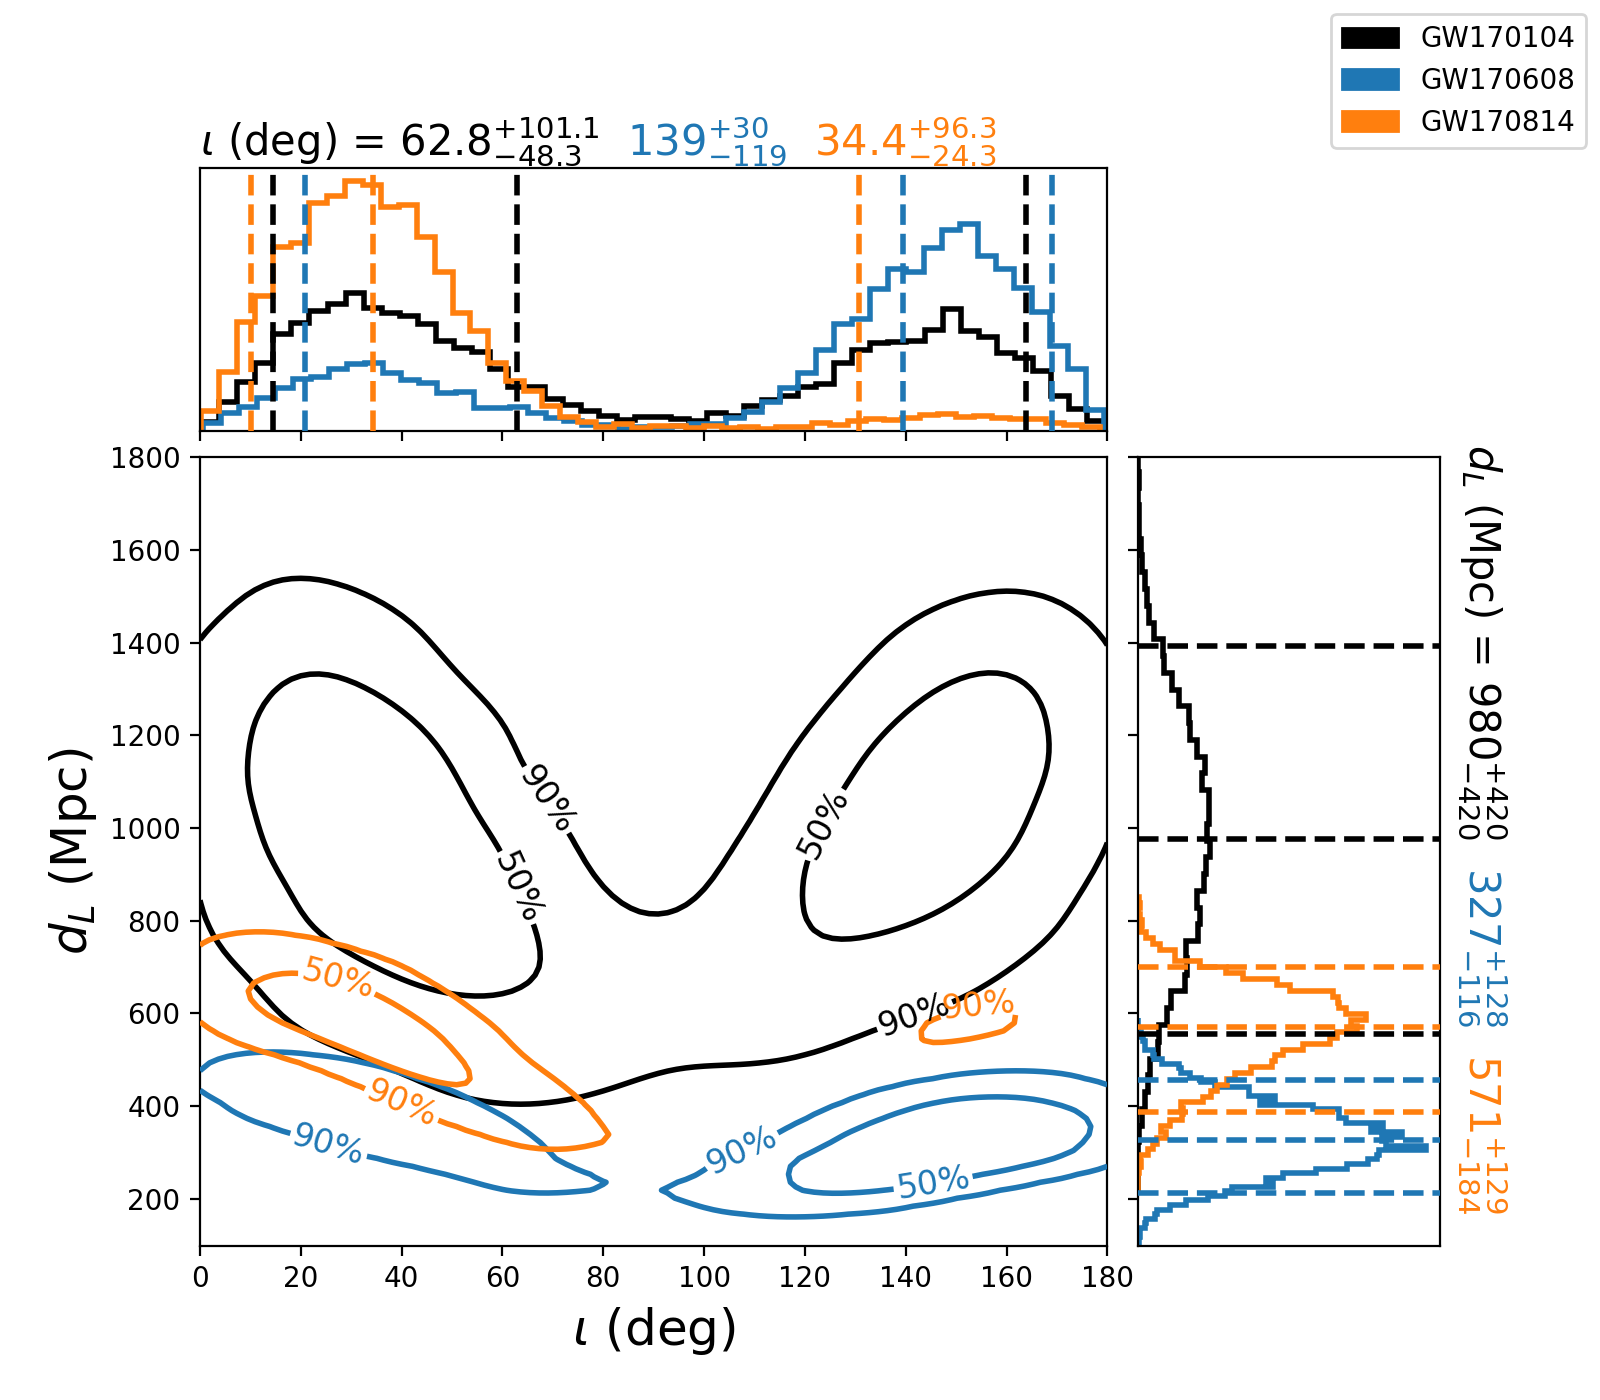

In [39]:
Image('iota_dl.png')

## Visualizing posteriors as a scatter plot

The posteriors from a particular analysis can be visualized as a scatter plot where the positions of all the samples are plotted on the corner plot. PyCBC Inference provides plotting tools for making such a plot. Below is an example of making a scatter plot for the chirp mass $\mathcal{M}$ and mass ratio $q$, distance $d_L$ and inclination angle $\iota$ posteriors using PyCBC Inference's plotting executable.

In [28]:
!pycbc_inference_plot_posterior \
    --input-file 'posteriors/GW170104/gw170104_posteriors_thinned.hdf' \
    --output-file 'gw170104_mc_q_dl_iota_scatter.png' \
    --plot-scatter \
    --plot-marginal \
    --plot-contour \
    --z-arg snr \
    --parameters \
        mchirp \
        "primary_mass(mass1, mass2)/secondary_mass(mass1, mass2):\$q$" \
        chi_eff \
        distance \
        "inclination*180/pi:$\iota$ (deg)" \

/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


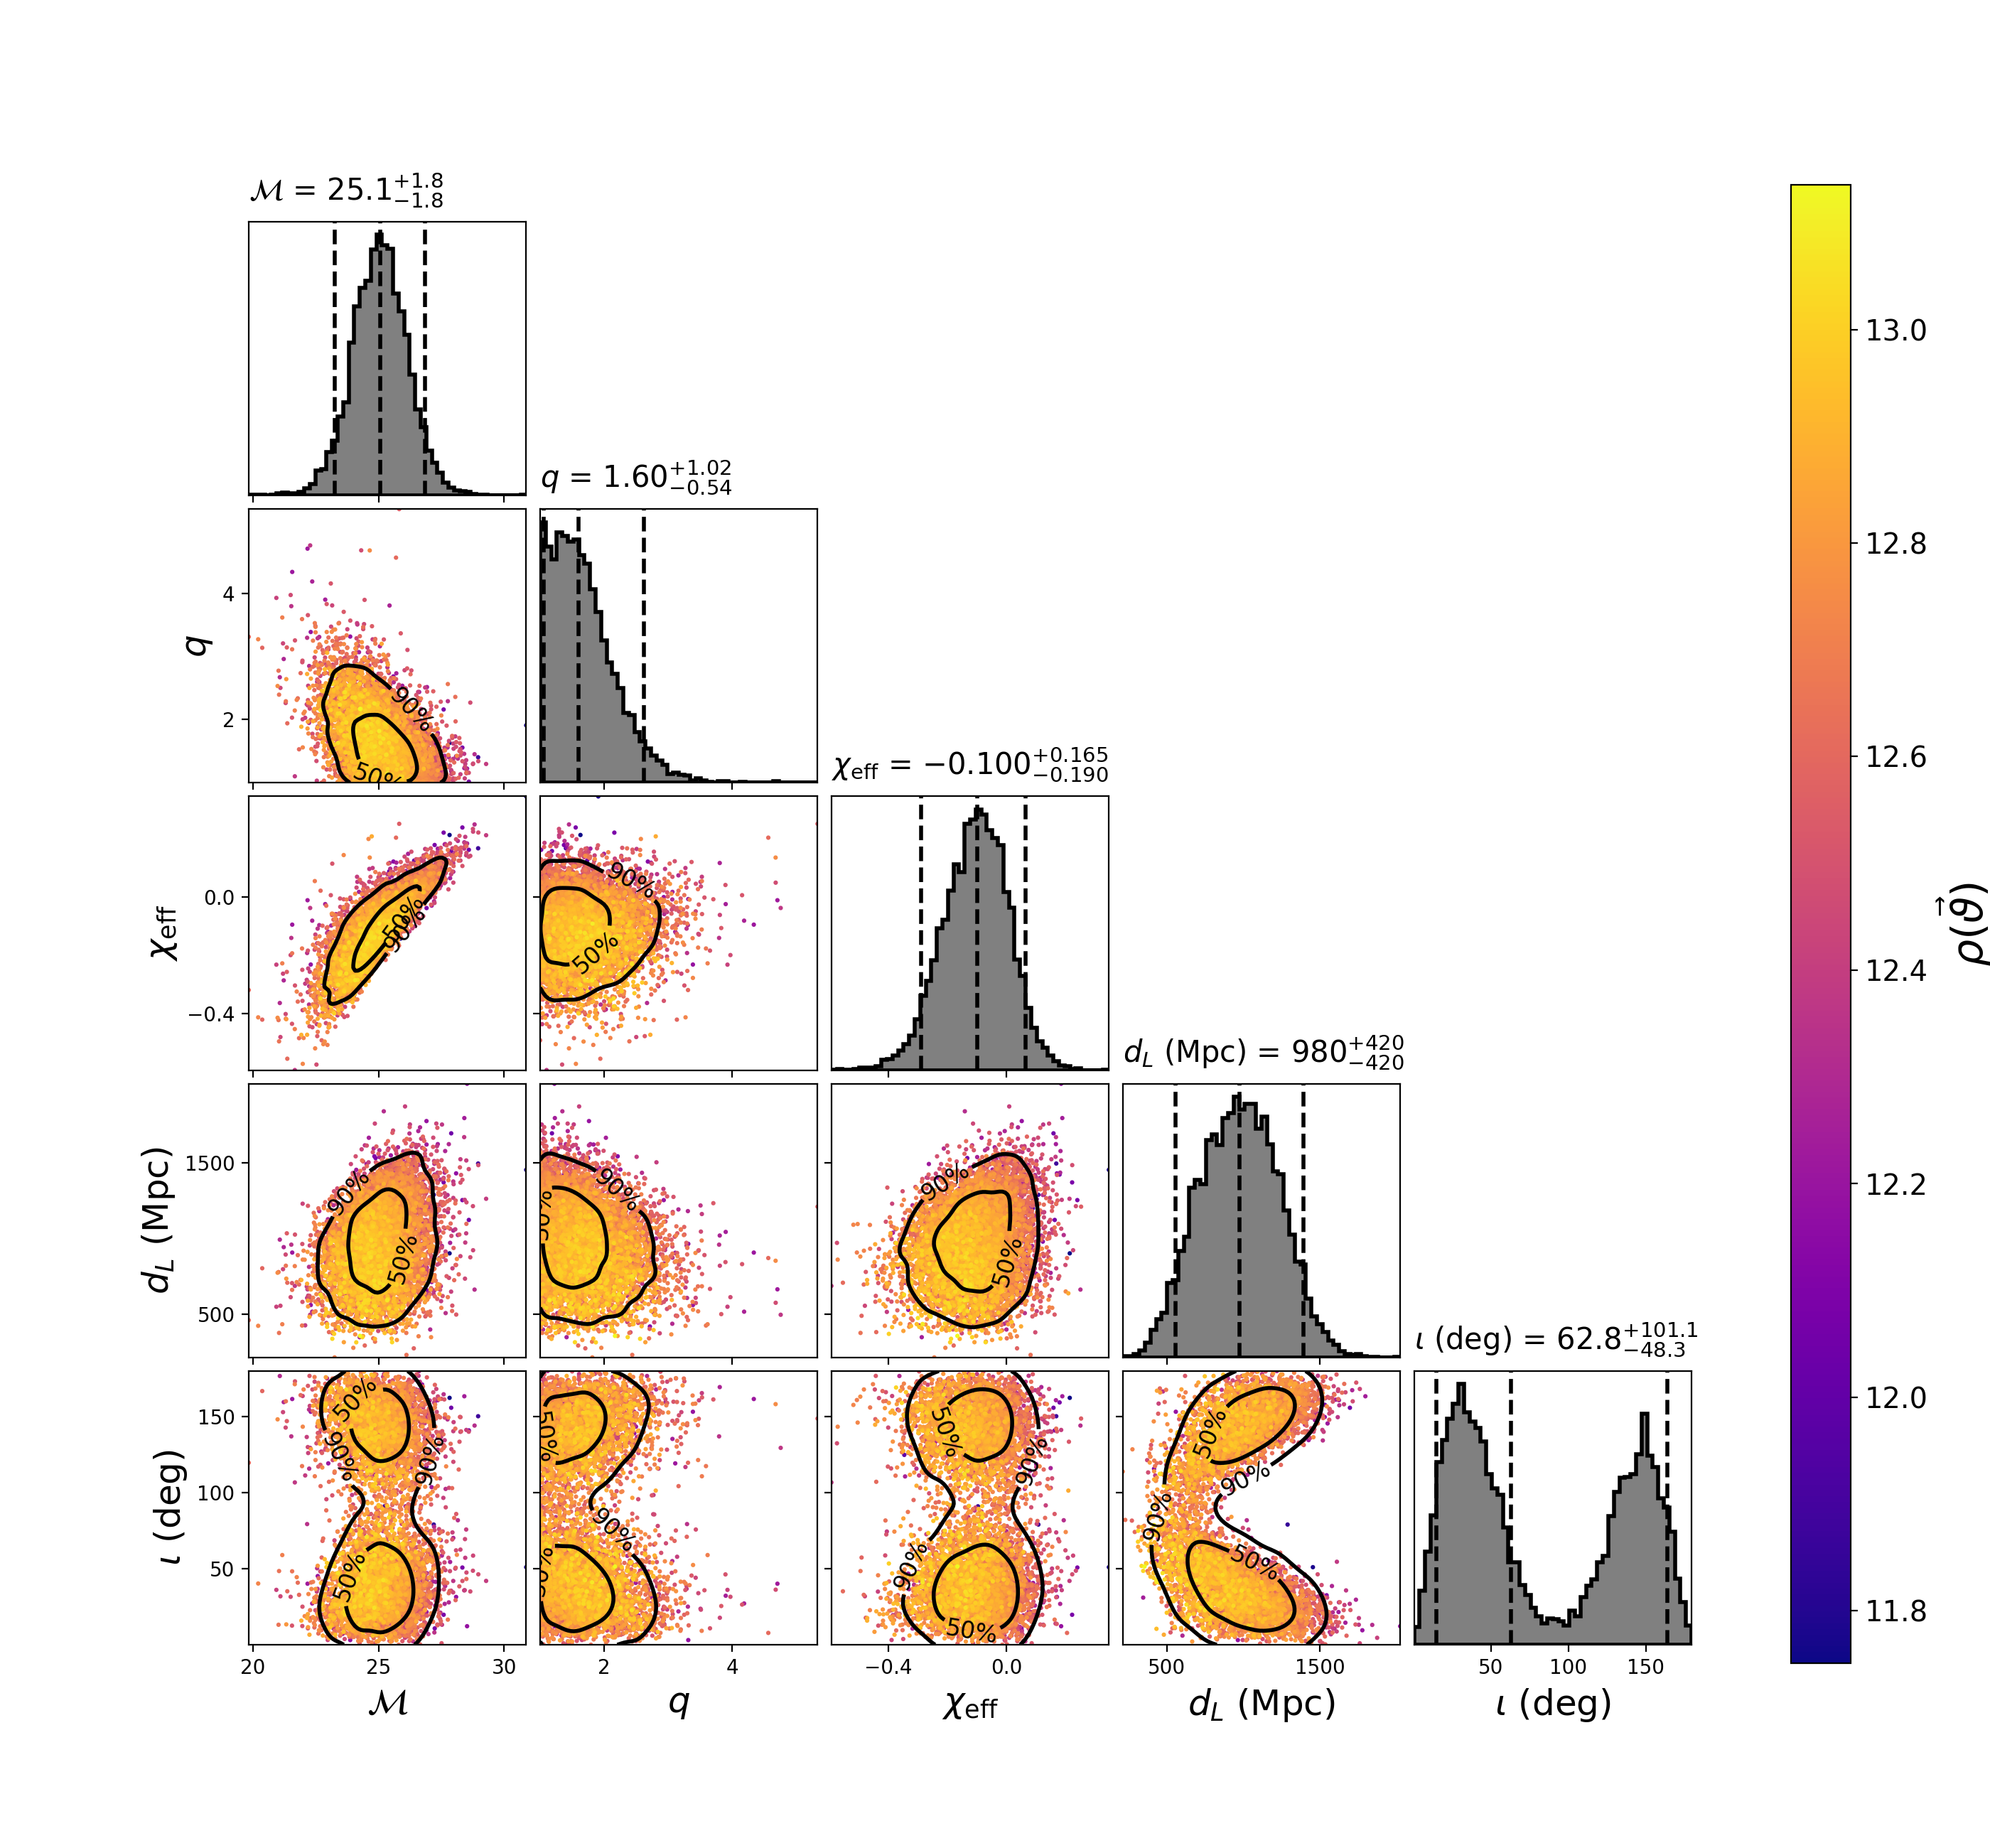

In [29]:
Image('gw170104_mc_q_dl_iota_scatter.png')

## Visualizing posteriors as a density plot


The posteriors can also be visualized as a density plot. Below is an example for constructing such a plot using PyCBC Inference's plotting executable.

In [31]:
!pycbc_inference_plot_posterior \
    --input-file 'posteriors/GW170104/gw170104_posteriors_thinned.hdf' \
    --output-file 'gw170104_q_chieff_density.png' \
    --plot-marginal \
    --plot-density \
    --density-cmap BuPu \
    --z-arg logplr \
    --plot-contour \
    --contour-color "purple" \
    --parameters "(primary_mass(mass1, mass2))/(secondary_mass(mass1, mass2)):\$q$" \
                 chi_eff

/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


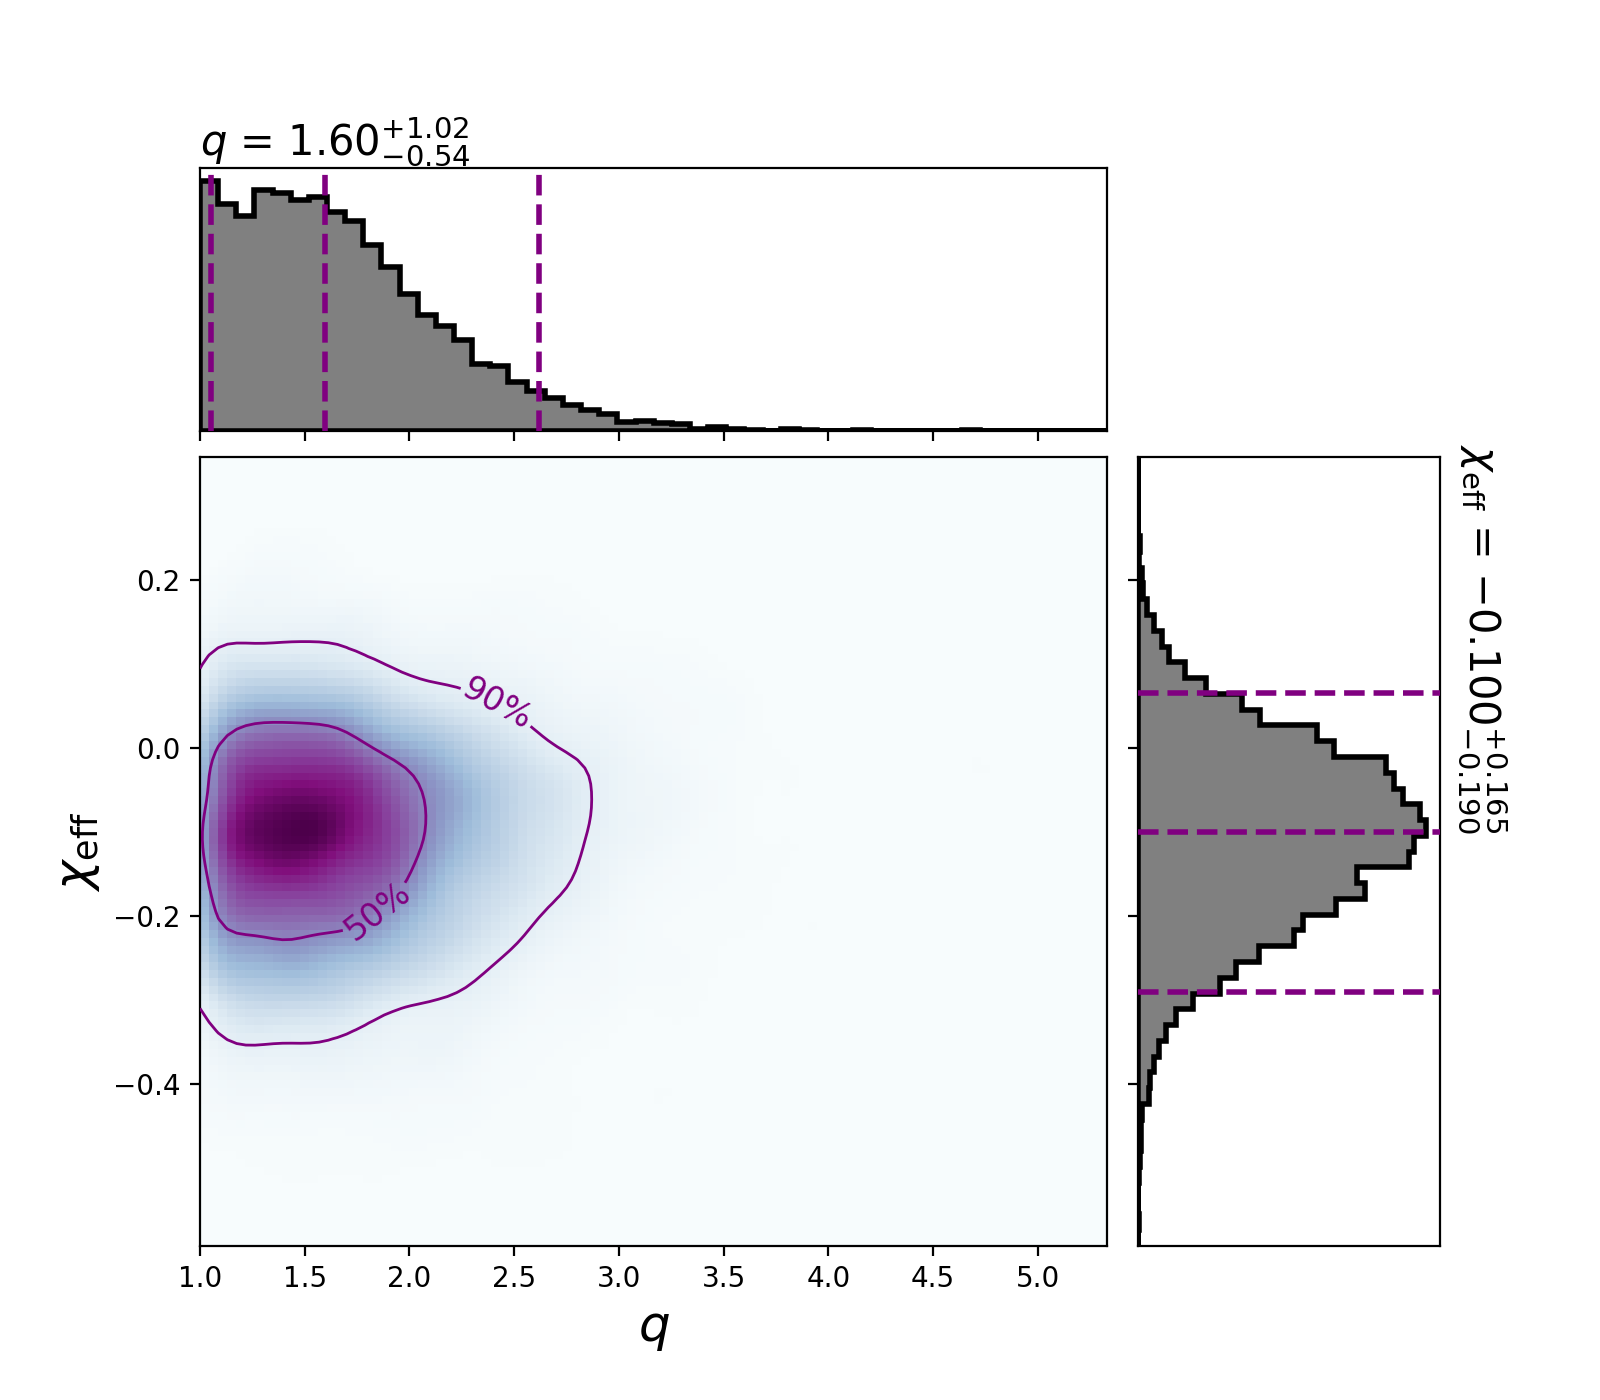

In [32]:
Image('gw170104_q_chieff_density.png')

## Acknowledgements
This research has made use of data from the Gravitational Wave Open Science Center [https://www.gw-openscience.org](https://www.gw-openscience.org). Computations were performed in the Syracuse University SUGWG cluster.

**Funding:** This work was supported by NSF awards PHY-1707954 (DAB, SD), and PHY-1607169 (SD). SD was also supported by the Inaugural Kathy '73 and Stan '72 Walters Endowed Fund for Science Research Graduate Felowship at Syracuse University. Computations were supported by Syracuse University and NSF award OAC-1541396.

**Authors' contributions:** Conceptualization: DAB, Methodology: SD, CMB, CDC, AHN; Software: CMB, CDC, SD, AHN, DAB; Validation: CDC, CMB, AHN; Formal Analysis: SD; Investigation: SD, CMB, CDC, AHN; Resources: DAB; Data Curation: DAB, CDC, CMB, AHN and SD; Writing: SD, CMB, CDC, DAB, and AHN; Visualization: SD, CMB, CDC, AHN; Supervision: DAB; Project Administration: DAB; Funding Acquisition: DAB.